# Model validation currents

Note: this notebook requires the model output data

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Import packages

In [ ]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h
import pandas as pd
from pathlib import Path

In [116]:
import importlib
importlib.reload(h)

<module 'helper' from 'c:\\Users\\muje\\Projects\\WaterBench-MIKE21SW-SouthernNorthSea\\code\\helper.py'>

### Define paths

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [74]:
# Load observation data
swhlist = h.get_swh_point_obs(station_file="subset_stations.csv")
tplist = h.get_tp_point_obs(station_file="subset_stations.csv")


In [76]:
def get_mdir_point_obs(station_file):
    """Get wave period point observations as list of PointObservation objects"""
    q = ms.Quantity(name="Mean wave direction", unit="degree")
    mdirlist = []

    df_stn = pd.read_csv(obs_fldr + station_file, index_col=0)

    for i, row in df_stn.iterrows():
            if not Path(obs_fldr + f"{i}.csv").exists():
                continue
            df = pd.read_csv(obs_fldr + f"{i}.csv", index_col=0)
            df.index = pd.to_datetime(df.index, format="ISO8601")
            # Check is VMDR column exists
            if 'VMDR' not in df.columns:
                continue
            o = ms.PointObservation(df.VMDR, x=row['lon'], y=row['lat'], name=i, quantity=q)
            mdirlist.append(o)

    return mdirlist

In [79]:
mdirlist = get_mdir_point_obs(station_file="stations.csv")


In [80]:
mdirlist

[<PointObservation>: IJmuidenMunitiestort_
 Location: 4.05833, 52.55
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:50:00
 Quantity: Mean wave direction [degree],
 <PointObservation>: WaddenEierlandseGat
 Location: 4.66167, 53.27694
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:50:00
 Quantity: Mean wave direction [degree]]

In [81]:
# Load MIKE21 simulation data
mr_swh = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr_tp = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_dir = ms.DfsuModelResult(mr_fn, name="MIKE21", item=3)
mr_dir

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2022-12-31 23:00:00
Quantity: Mean Wave Direction [degree]

In [31]:
# swh 
cmps = []
for o in swhlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_swh))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")

cc_swh = ms.ComparerCollection(cmps)

In [94]:
# tp
cmps = []
for o in tplist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_tp))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")
        
cc_tp = ms.ComparerCollection(cmps)

In [82]:
# mdir
cmps = []
for o in mdirlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_dir))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")
        
cc_dir = ms.ComparerCollection(cmps)

## Skill tables

In [83]:
# Print statistics for the tp-component
cc_dir.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
IJmuidenMunitiestort_,49802,-5.608,69.879,69.654,25.652,0.797,0.293,0.574
WaddenEierlandseGat,45187,-5.213,71.479,71.289,26.525,0.802,0.312,0.604


In [60]:
# Print statistics for the swh-component
cc_swh.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Europlatform2,51280,0.140,0.307,0.273,0.206,0.962,0.234,0.842
IJmuidenMunitiestort_,49804,0.087,0.258,0.243,0.177,0.965,0.194,0.908
J61,52187,0.140,0.326,0.294,0.233,0.960,0.199,0.877
K13a_,48749,0.106,0.290,0.270,0.206,0.963,0.187,0.898
WesthinderBuoy,17459,0.093,0.254,0.237,0.174,0.954,0.231,0.844


## Scatter plots

### Significant wave height

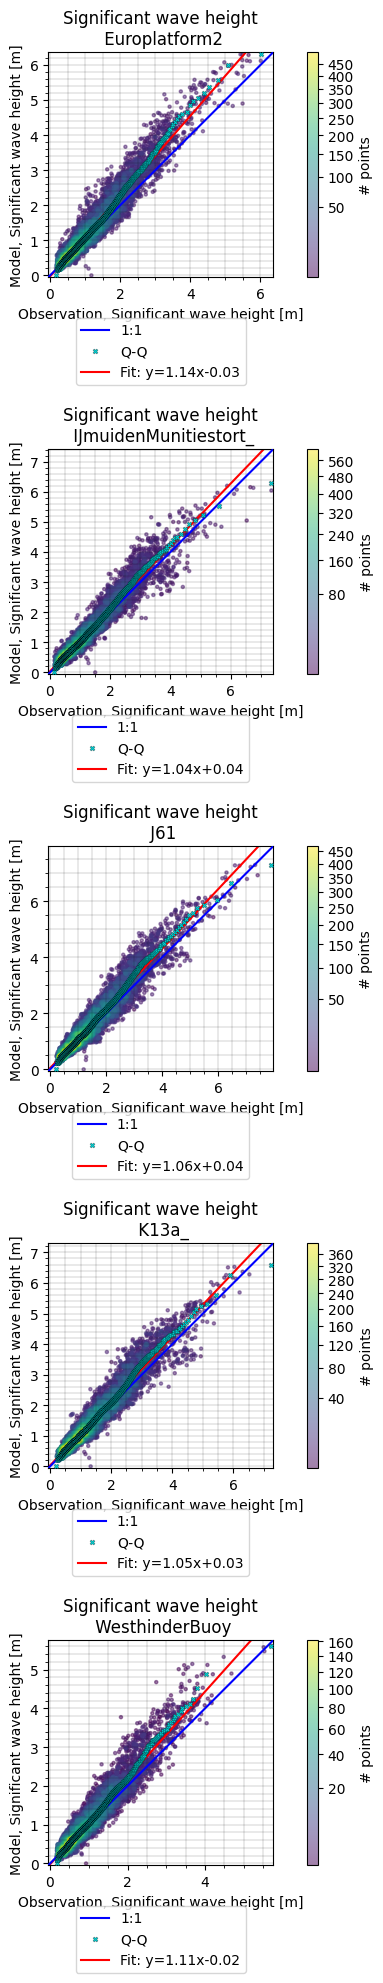

In [ ]:
# Plot 
h.plot_scatter_cc(cc = cc_swh, title='Significant wave height')


<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Peak wave period

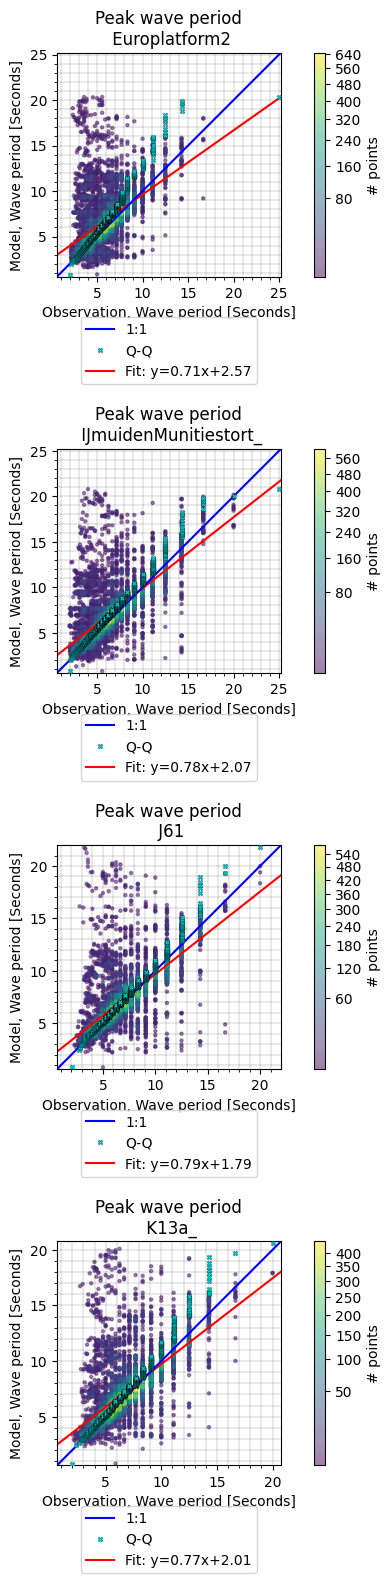

In [95]:
# Scatter plot
h.plot_scatter_cc(cc = cc_tp, title='Peak wave period')

### Mean wave direction

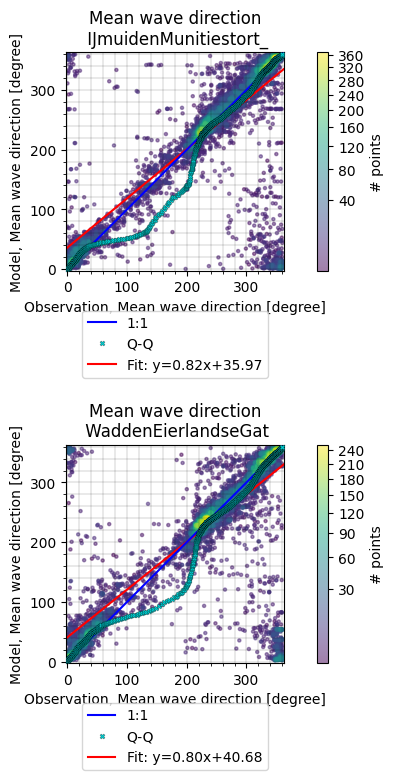

In [96]:
# Scatter plot
h.plot_scatter_cc(cc = cc_dir, title='Mean wave direction')

## Timeseries

### Significant wave height

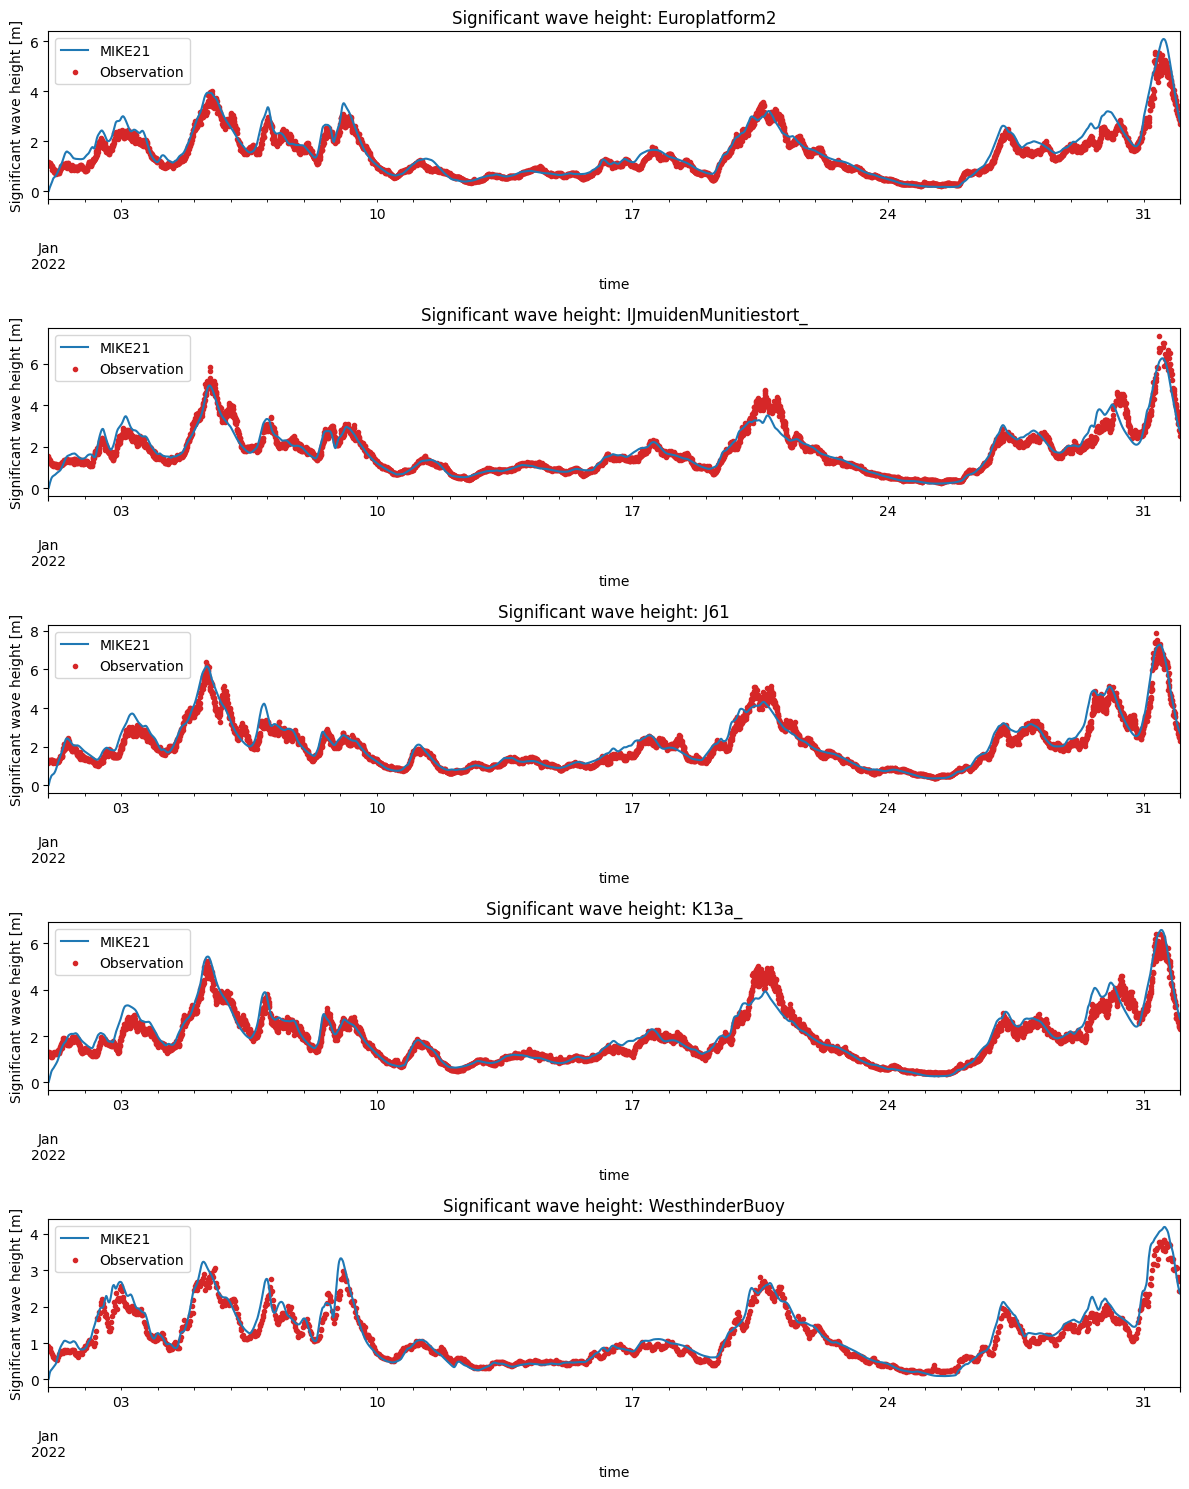

In [118]:
h.plot_timeseries_currents(cc = cc_swh, title='Significant wave height')

### Peak wave period

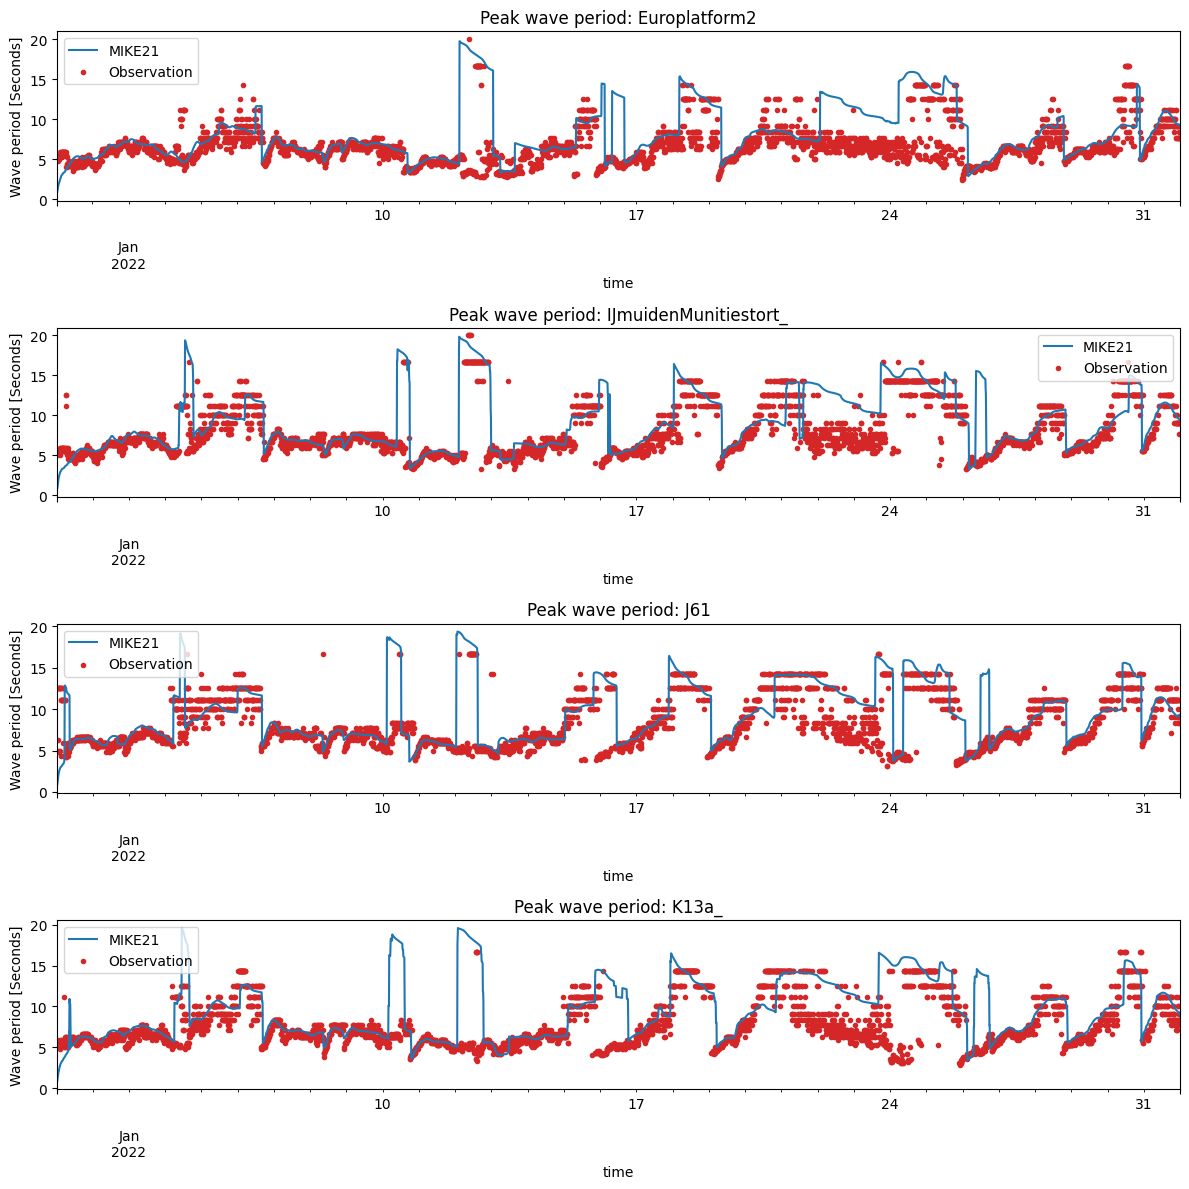

In [119]:
h.plot_timeseries_currents(cc = cc_tp, title='Peak wave period')

### Mean wave direction

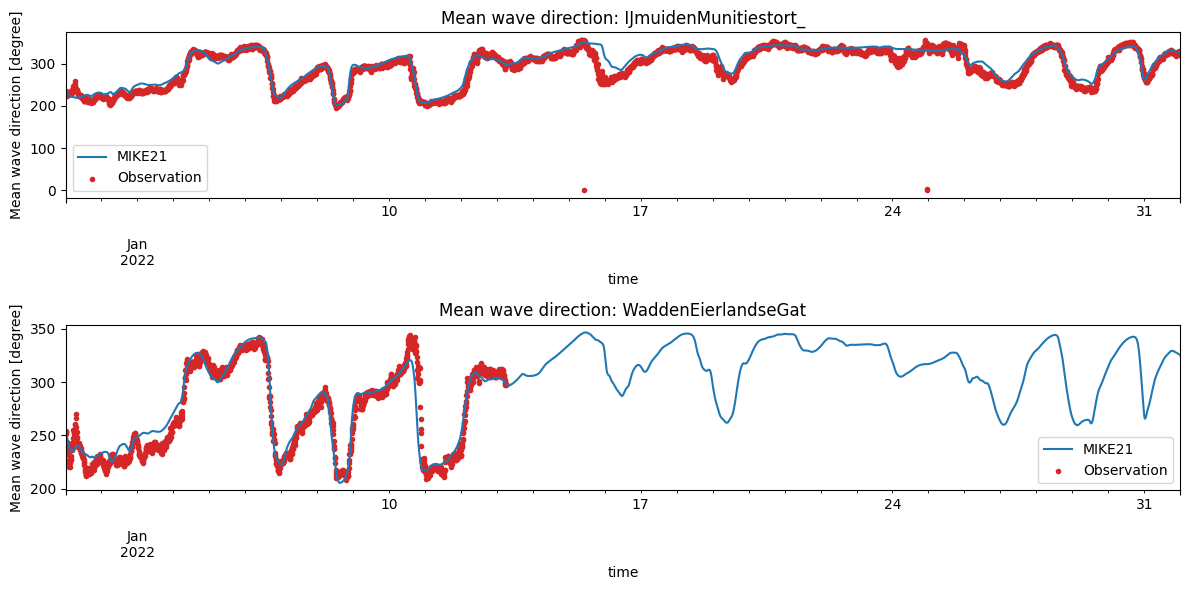

In [120]:
h.plot_timeseries_currents(cc = cc_dir, title='Mean wave direction')